# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import log_loss
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.model_selection import GridSearchCV,KFold,LeaveOneOut
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import umap

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Define functions

In [2]:
def ConvertLabels(labels):
    #labels = np.asarray(labels)
    #for label in range(len(labels))
     #   print(label)
    column_name = 'label'
    labels.loc[colon_label[column_name] > 0] = 1
    labels.loc[colon_label[column_name] < 0] = 0
    
    return labels

# Read data

In [3]:
colon       = pd.read_csv('colonCancerData.csv', index_col=0)
colon_label = pd.read_csv('label.csv')
colon_label = ConvertLabels(colon_label).squeeze(1)
data_label  = pd.concat([colon, colon_label], axis = 1, sort= False)

In [4]:
print('colon.shape:', colon.shape)
print('colon_label.shape', colon_label.shape)
print('data_label.shape', data_label.shape)

colon.shape: (62, 2000)
colon_label.shape (62,)
data_label.shape (62, 2001)


# Split data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(colon, colon_label, test_size=0.2, random_state=1234)

In [6]:
print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

X_train.shape: (49, 2000)
X_test.shape: (13, 2000)
y_train.shape: (49,)
y_test.shape: (13,)


# Preprocess data

In [18]:
scaler   = StandardScaler()
colon_sc = scaler.fit_transform(colon)
X_train  = scaler.fit_transform(X_train)

# Create data clustering

## Hierarchical clustering

In [109]:
for i, label in enumerate(colon_label):
    if label == 1:
        print(i + 1, label)

2 1
4 1
6 1
8 1
10 1
12 1
14 1
16 1
18 1
20 1
22 1
24 1
39 1
42 1
43 1
48 1
50 1
51 1
54 1
55 1
60 1
62 1


In [110]:
for i, label in enumerate(colon_label):
    if label == 0:
        print(i + 1, label)

1 0
3 0
5 0
7 0
9 0
11 0
13 0
15 0
17 0
19 0
21 0
23 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
40 0
41 0
44 0
45 0
46 0
47 0
49 0
52 0
53 0
56 0
57 0
58 0
59 0
61 0


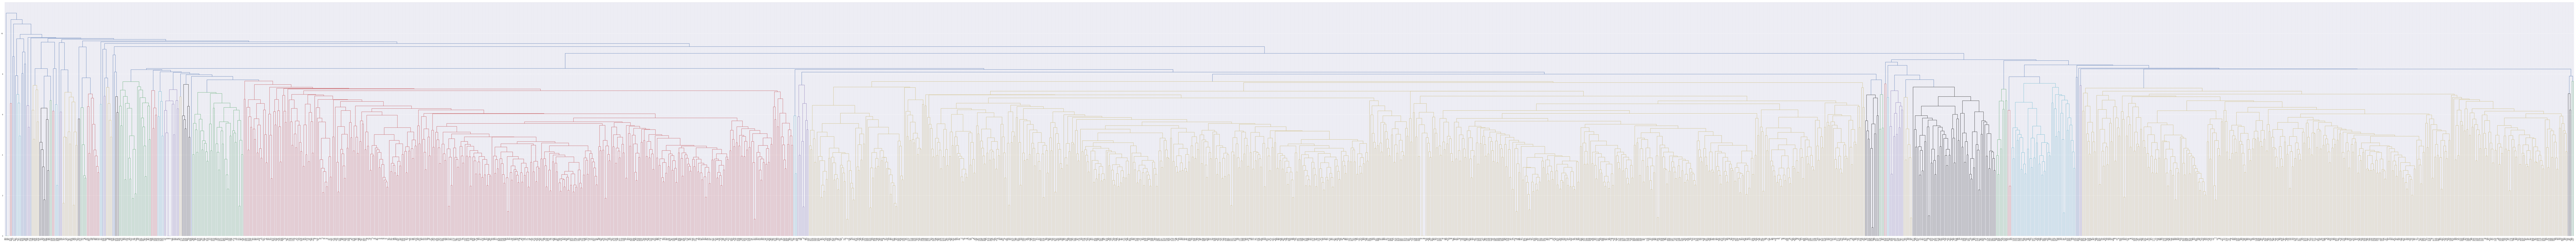

In [28]:
linked    = linkage(colon_sc.T, 'average')
labelList = range(1, 2001)
plt.figure(figsize=(300, 28))
dendrogram(linked,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=10)
#plt.show()
plt.savefig('GeneHierarchicalClusteringAverage.png')

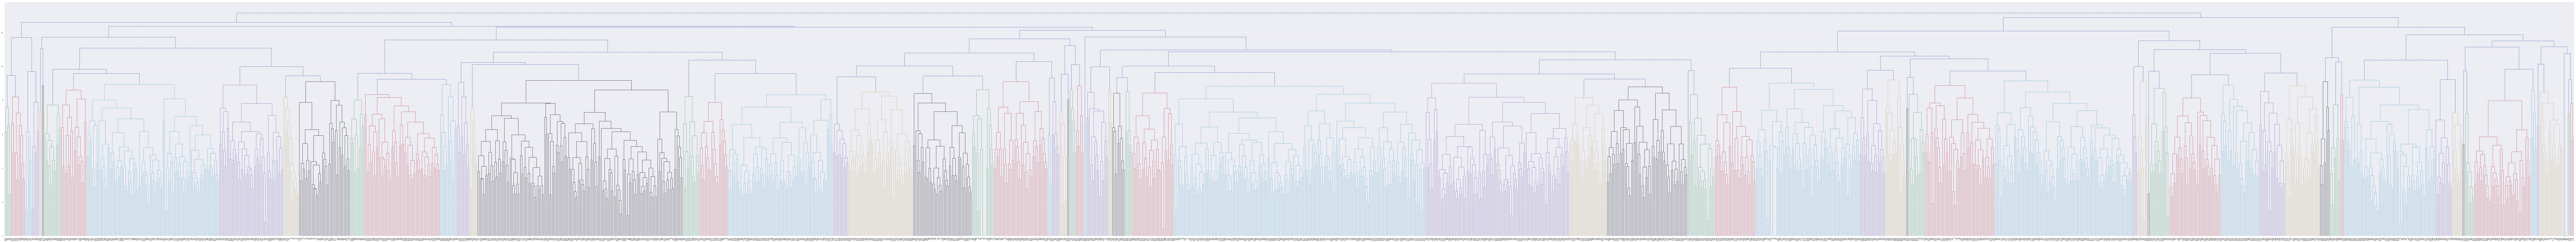

In [29]:
linked    = linkage(colon_sc.T, 'complete')
labelList = range(1, 2001)
plt.figure(figsize=(300, 28))
dendrogram(linked,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=10)
#plt.show()
plt.savefig('GeneHierarchicalClusteringComplete.png')

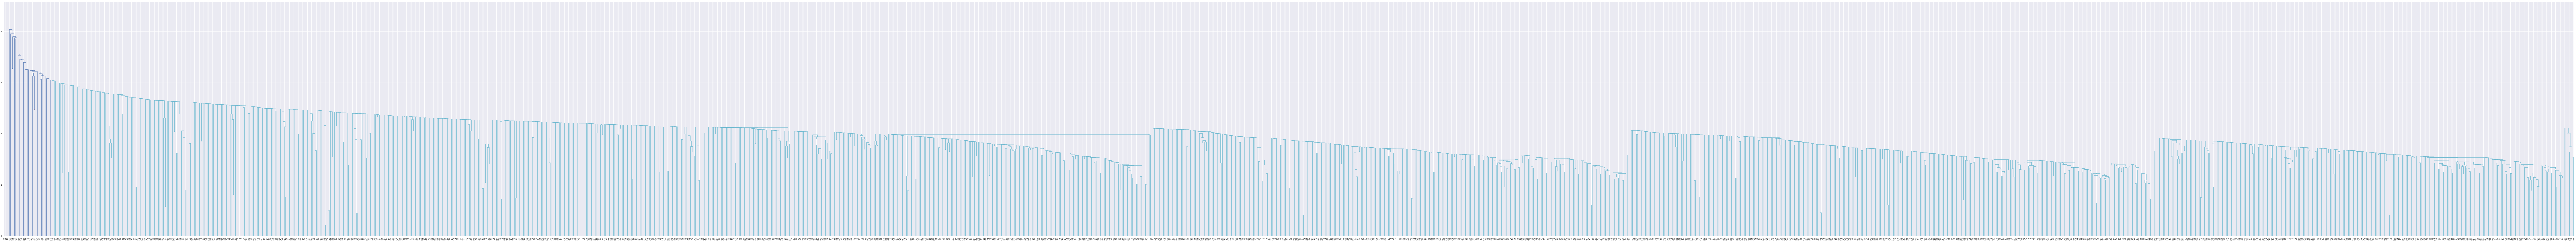

In [30]:
linked    = linkage(colon_sc.T, 'single')
labelList = range(1, 2001)
plt.figure(figsize=(300, 28))
dendrogram(linked,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=10)
#plt.show()
plt.savefig('GeneHierarchicalClusteringSingle.png')

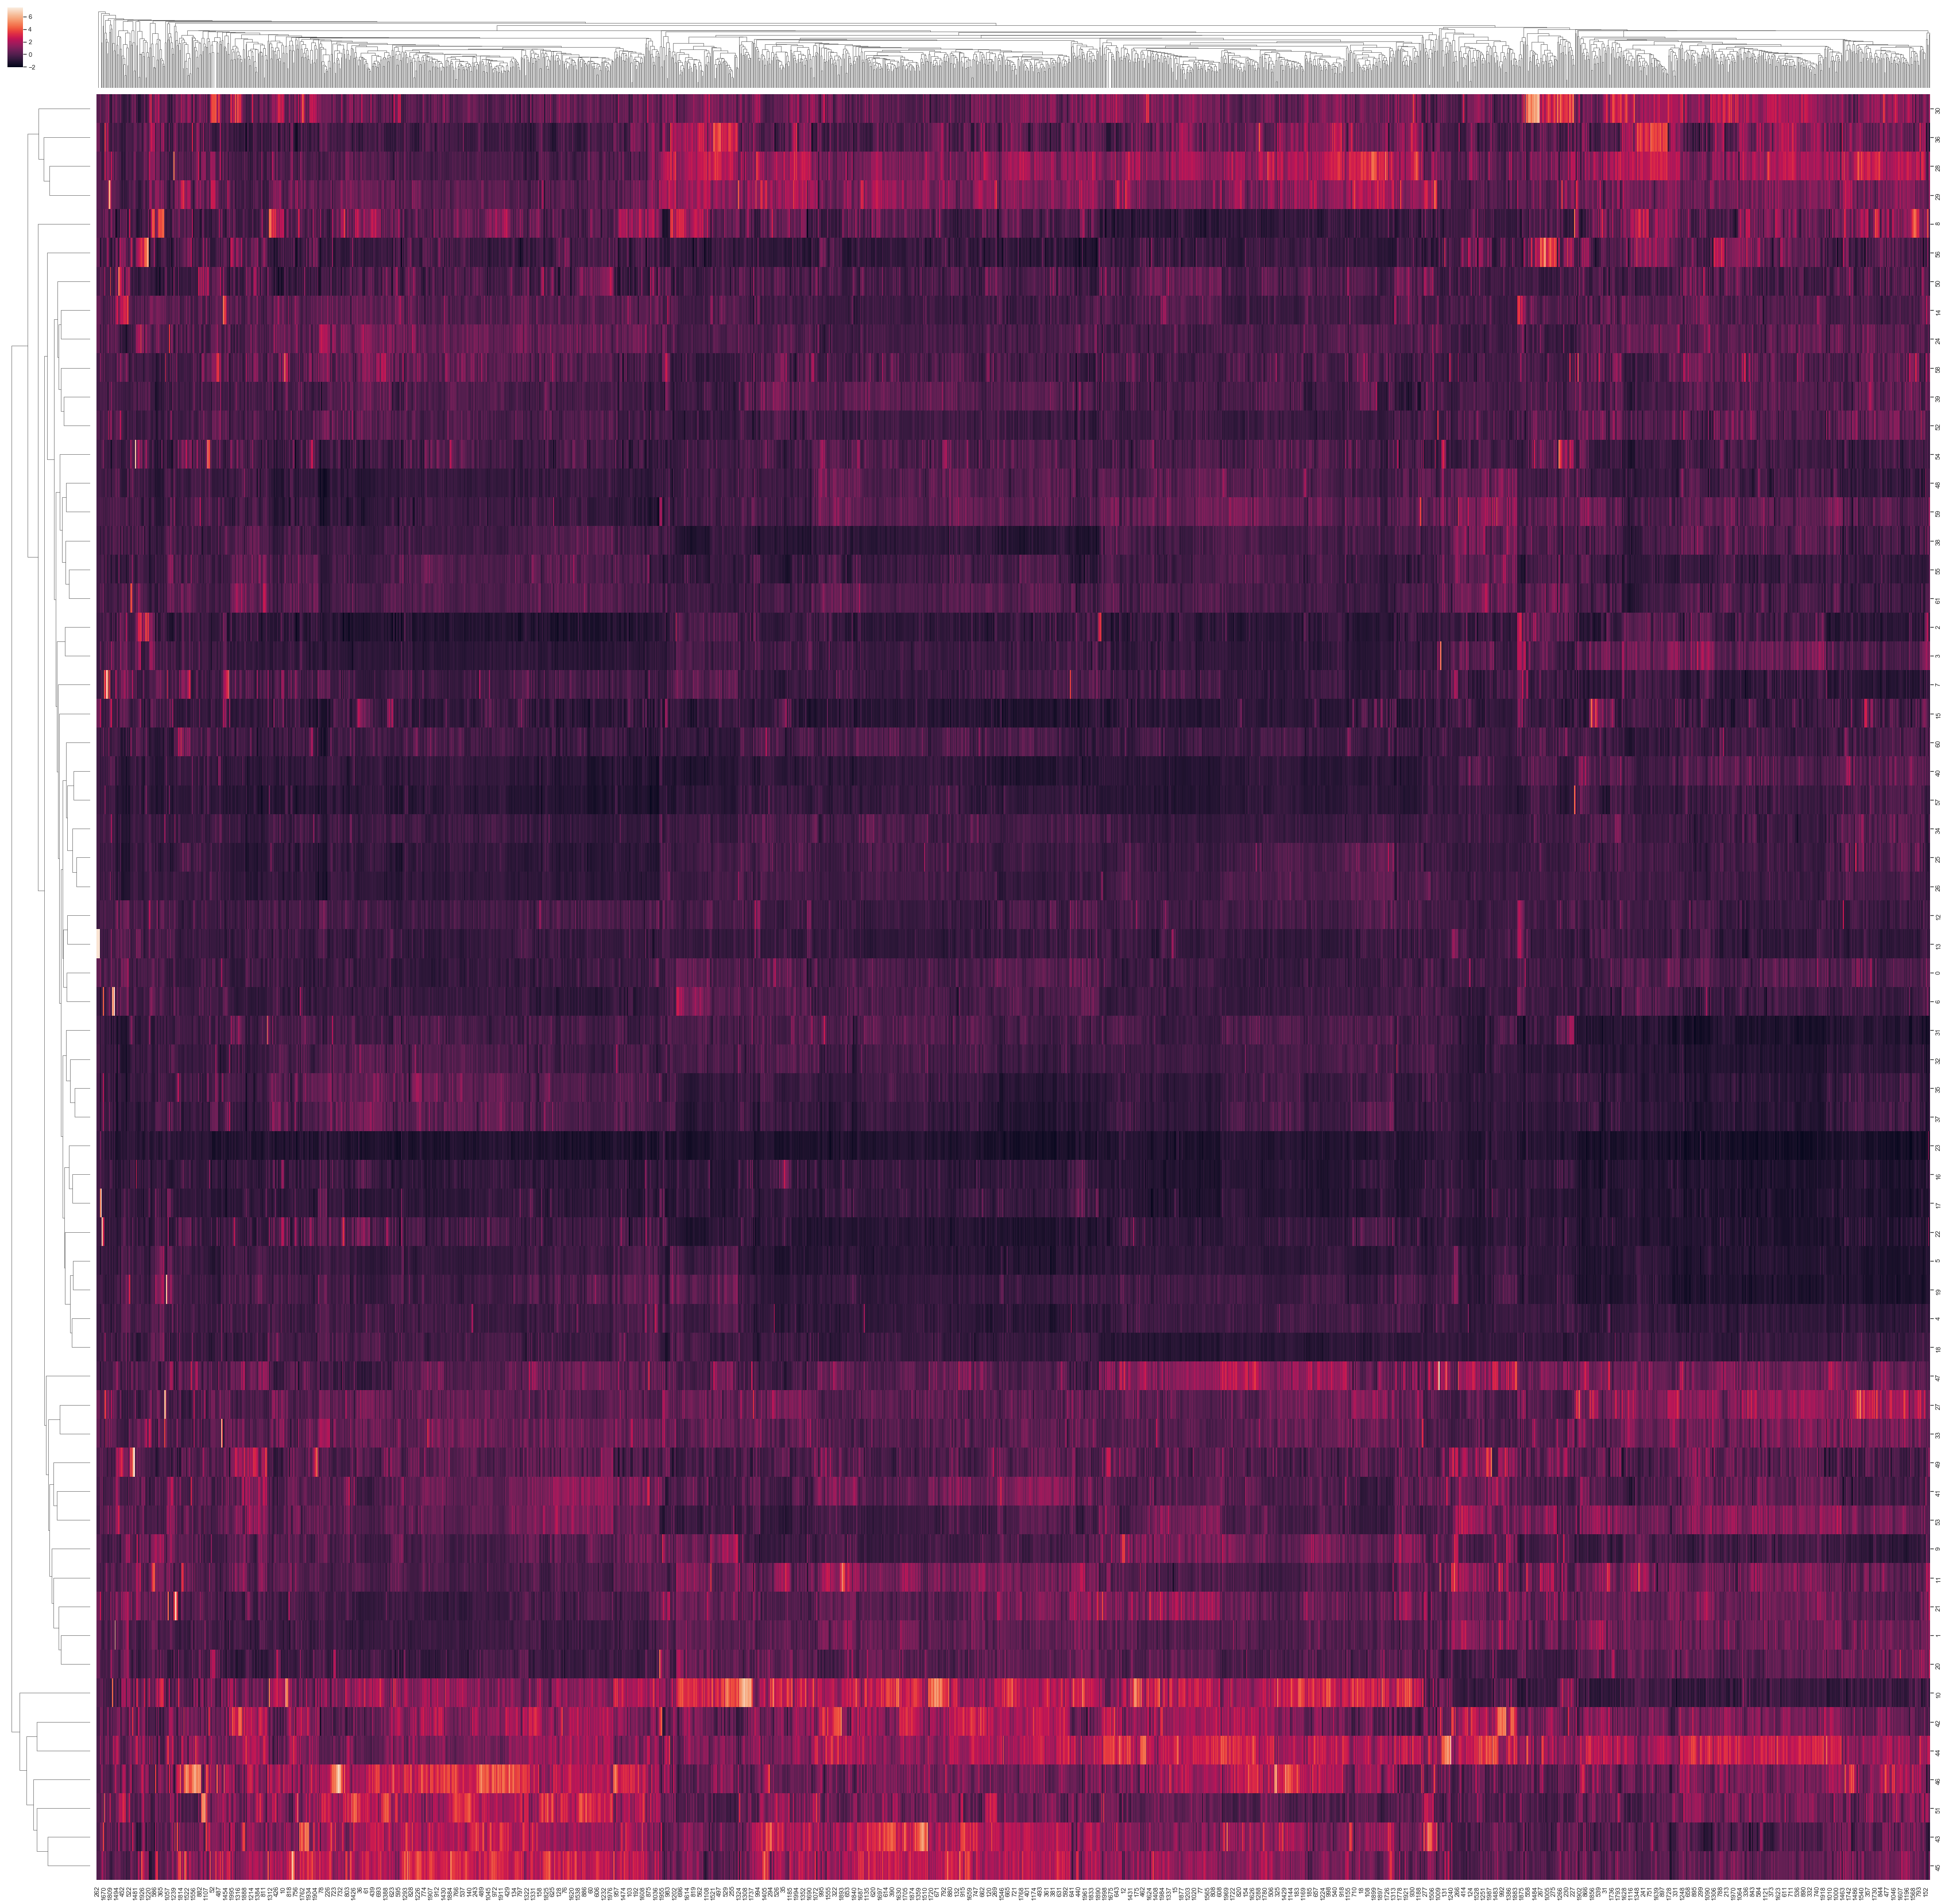

In [22]:
sns.set(color_codes=True)
sns.clustermap(colon_sc, method="average", figsize=(60, 60))

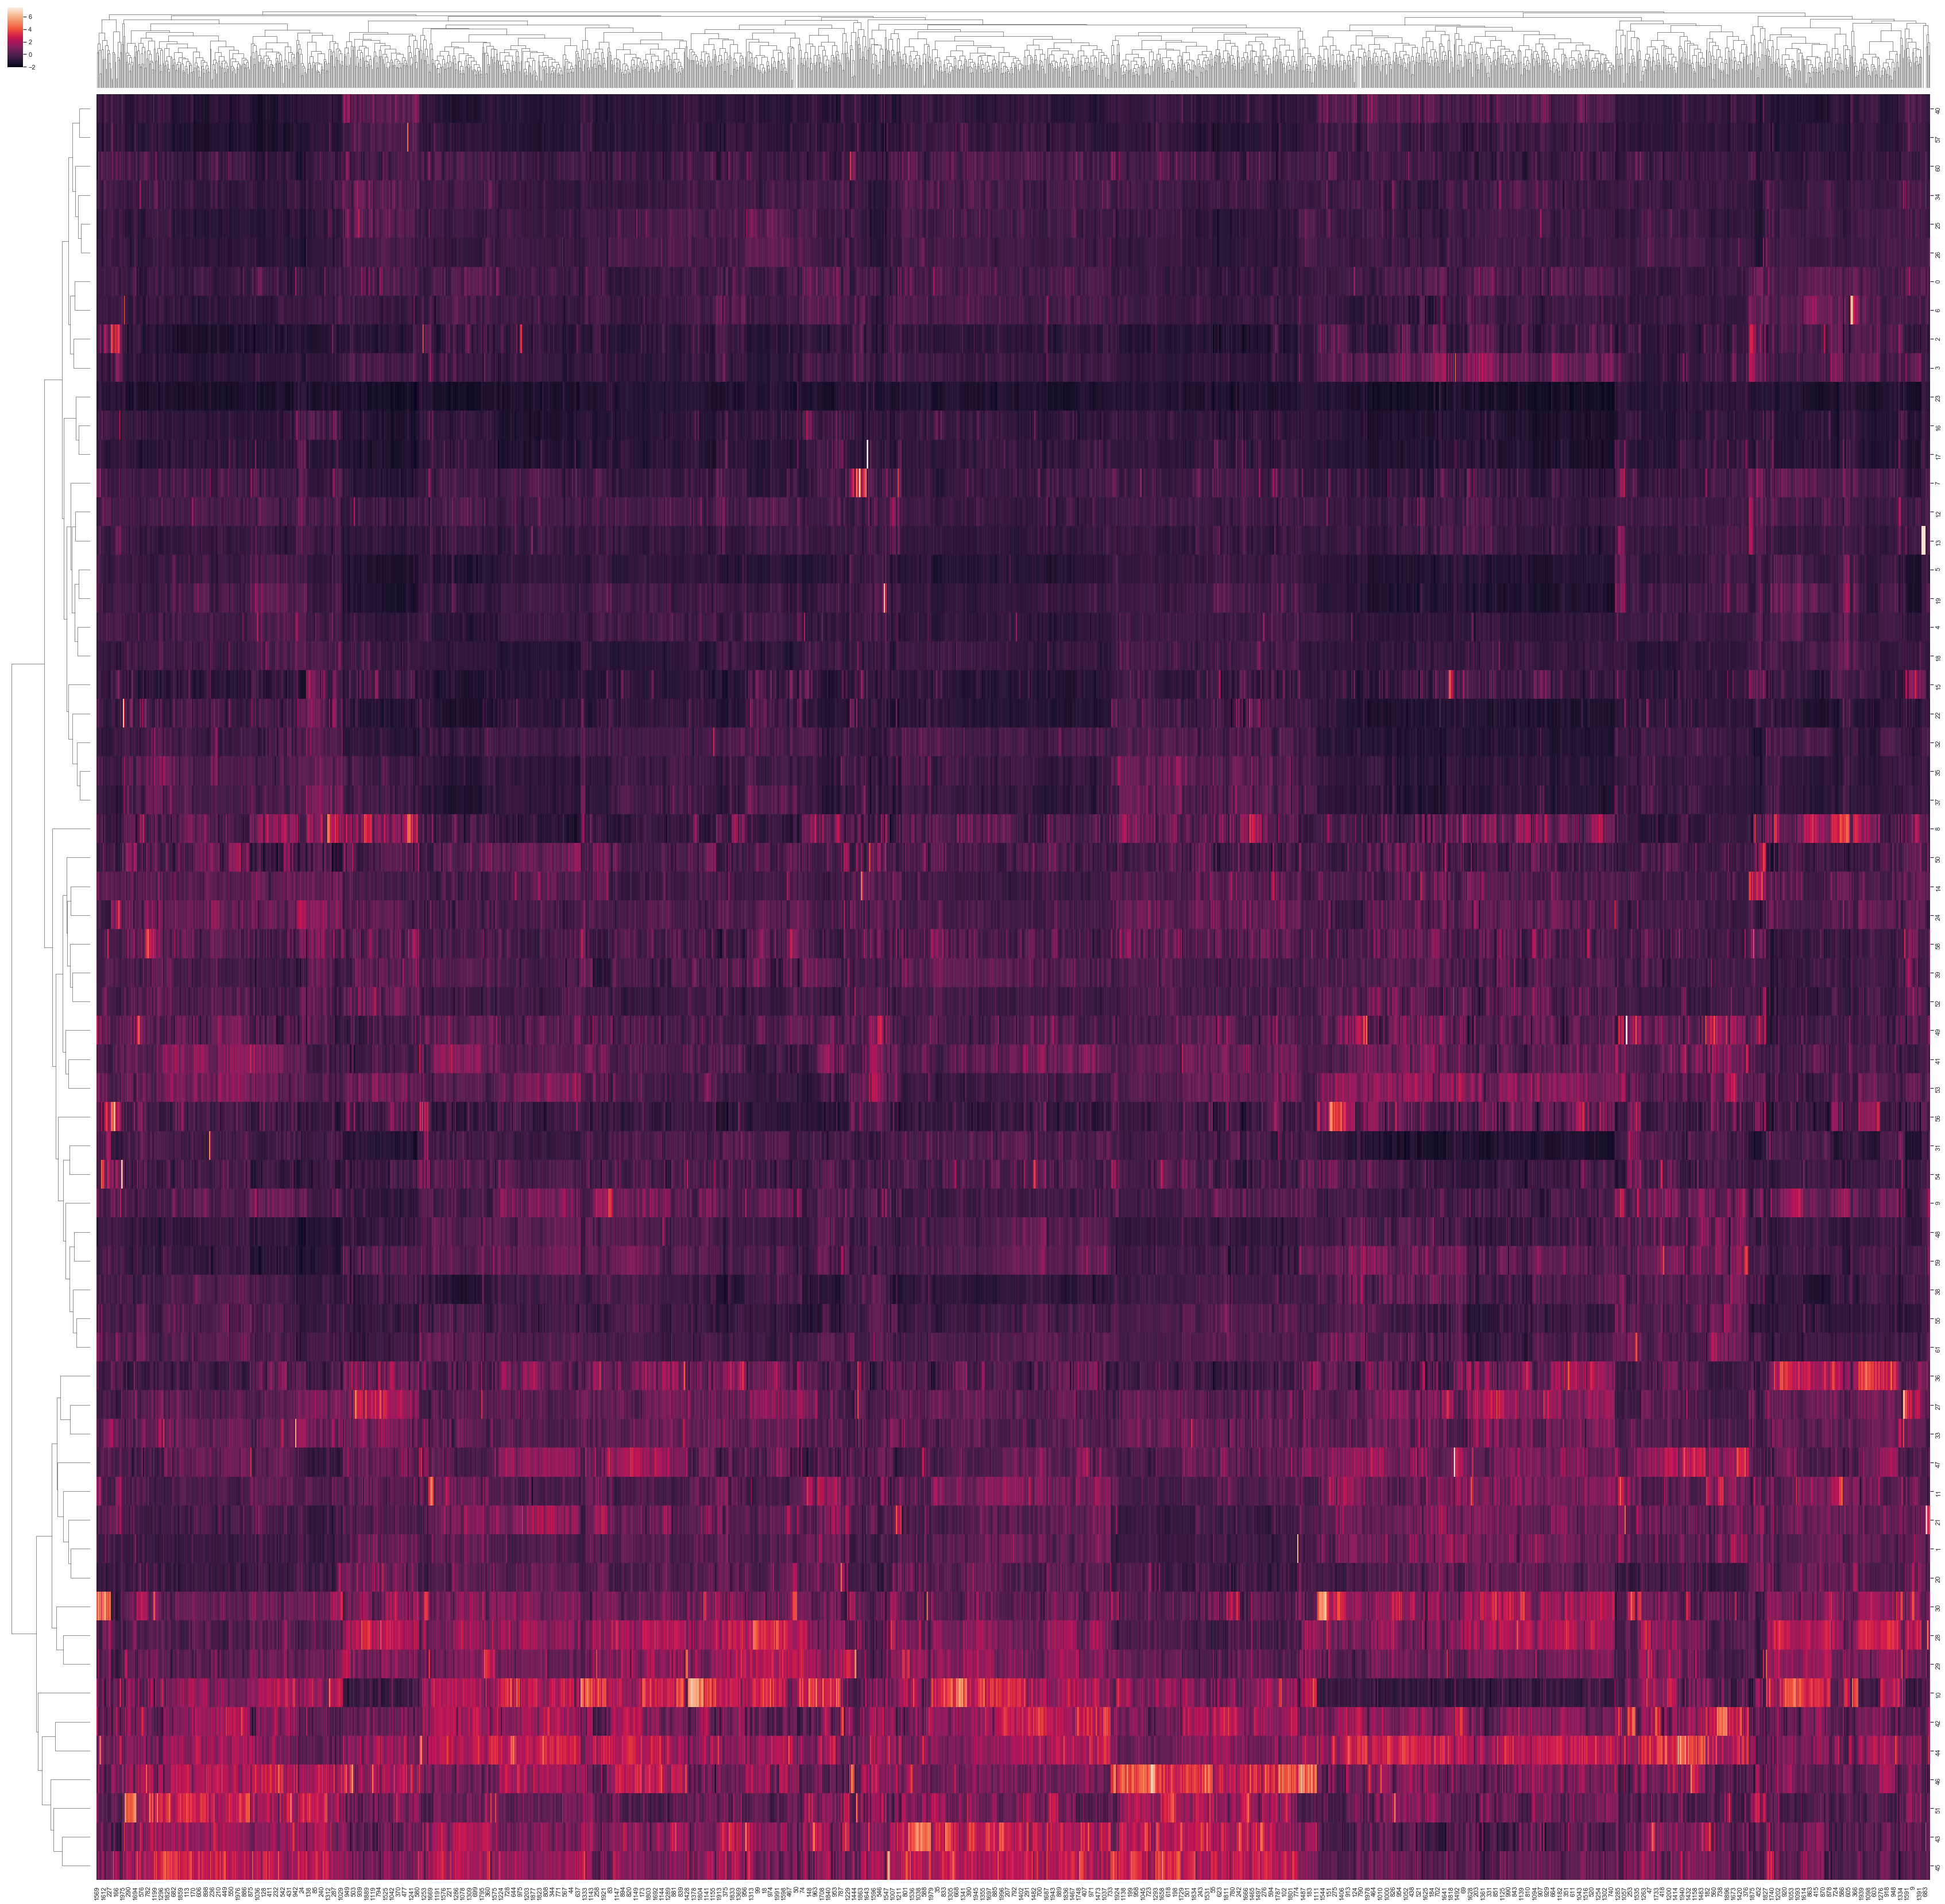

In [34]:
sns.clustermap(colon_sc, method="complete", figsize=(60, 60))

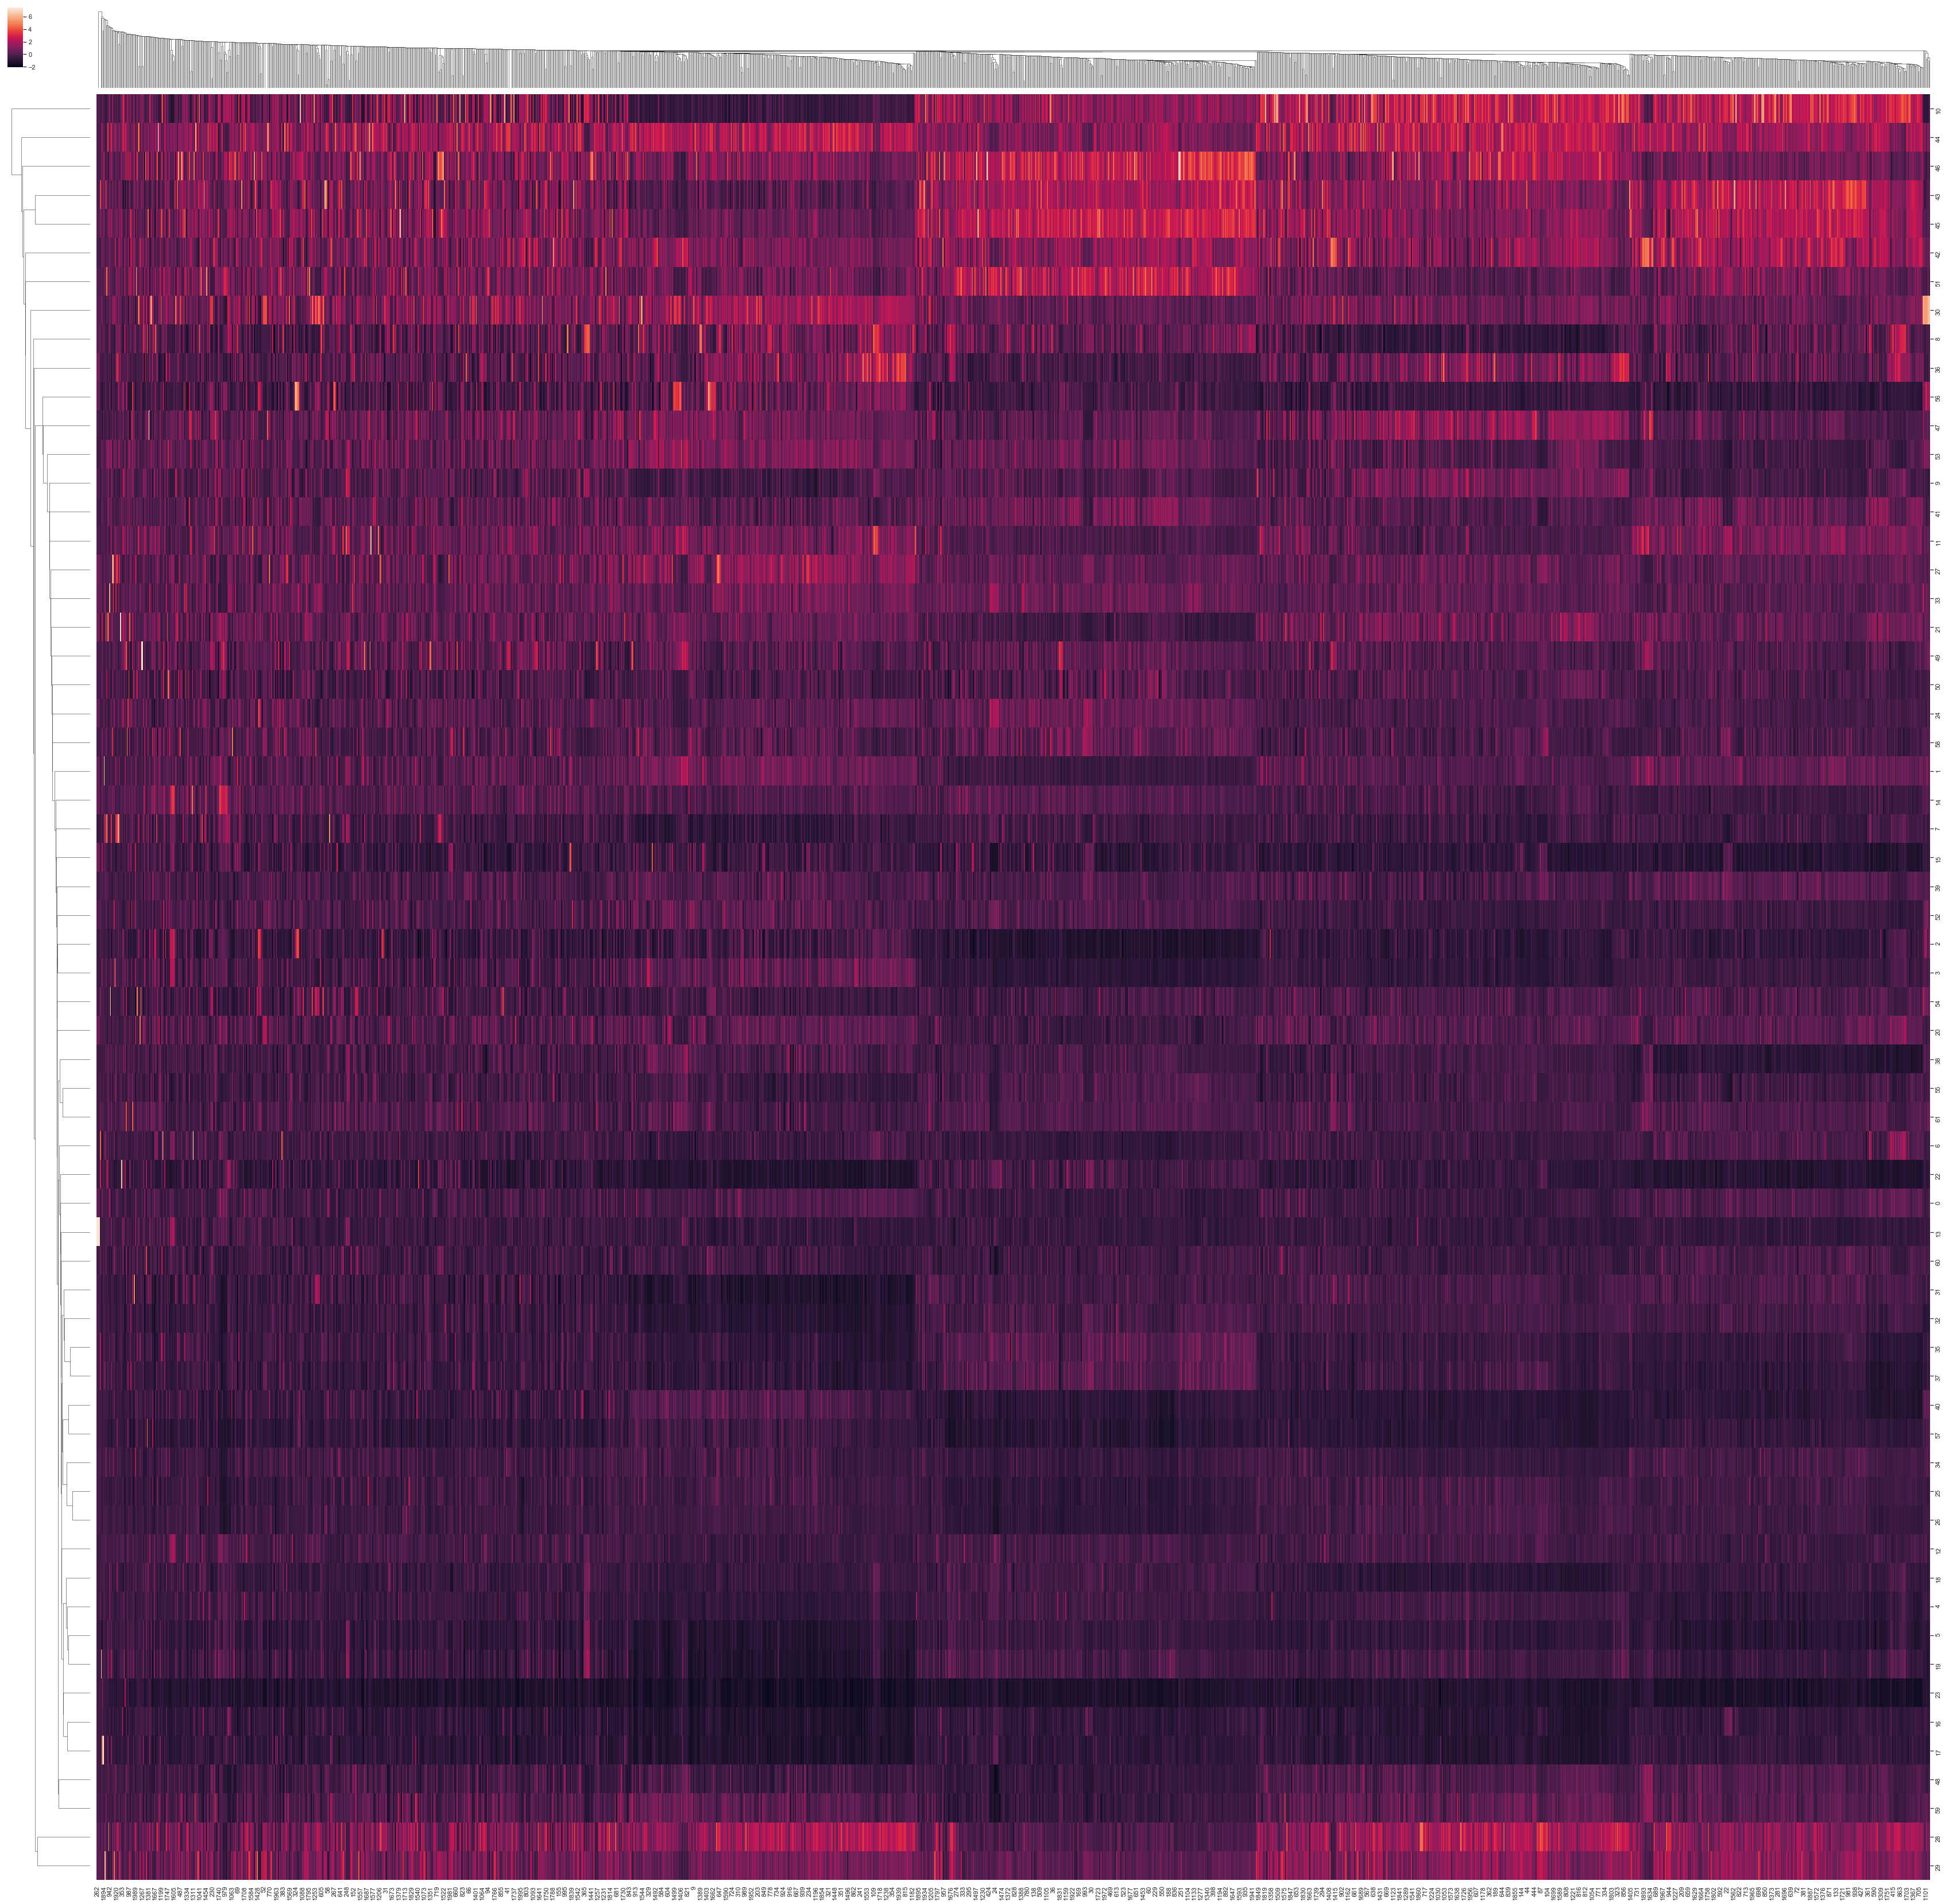

In [35]:
sns.clustermap(colon_sc, method="single", figsize=(60, 60))

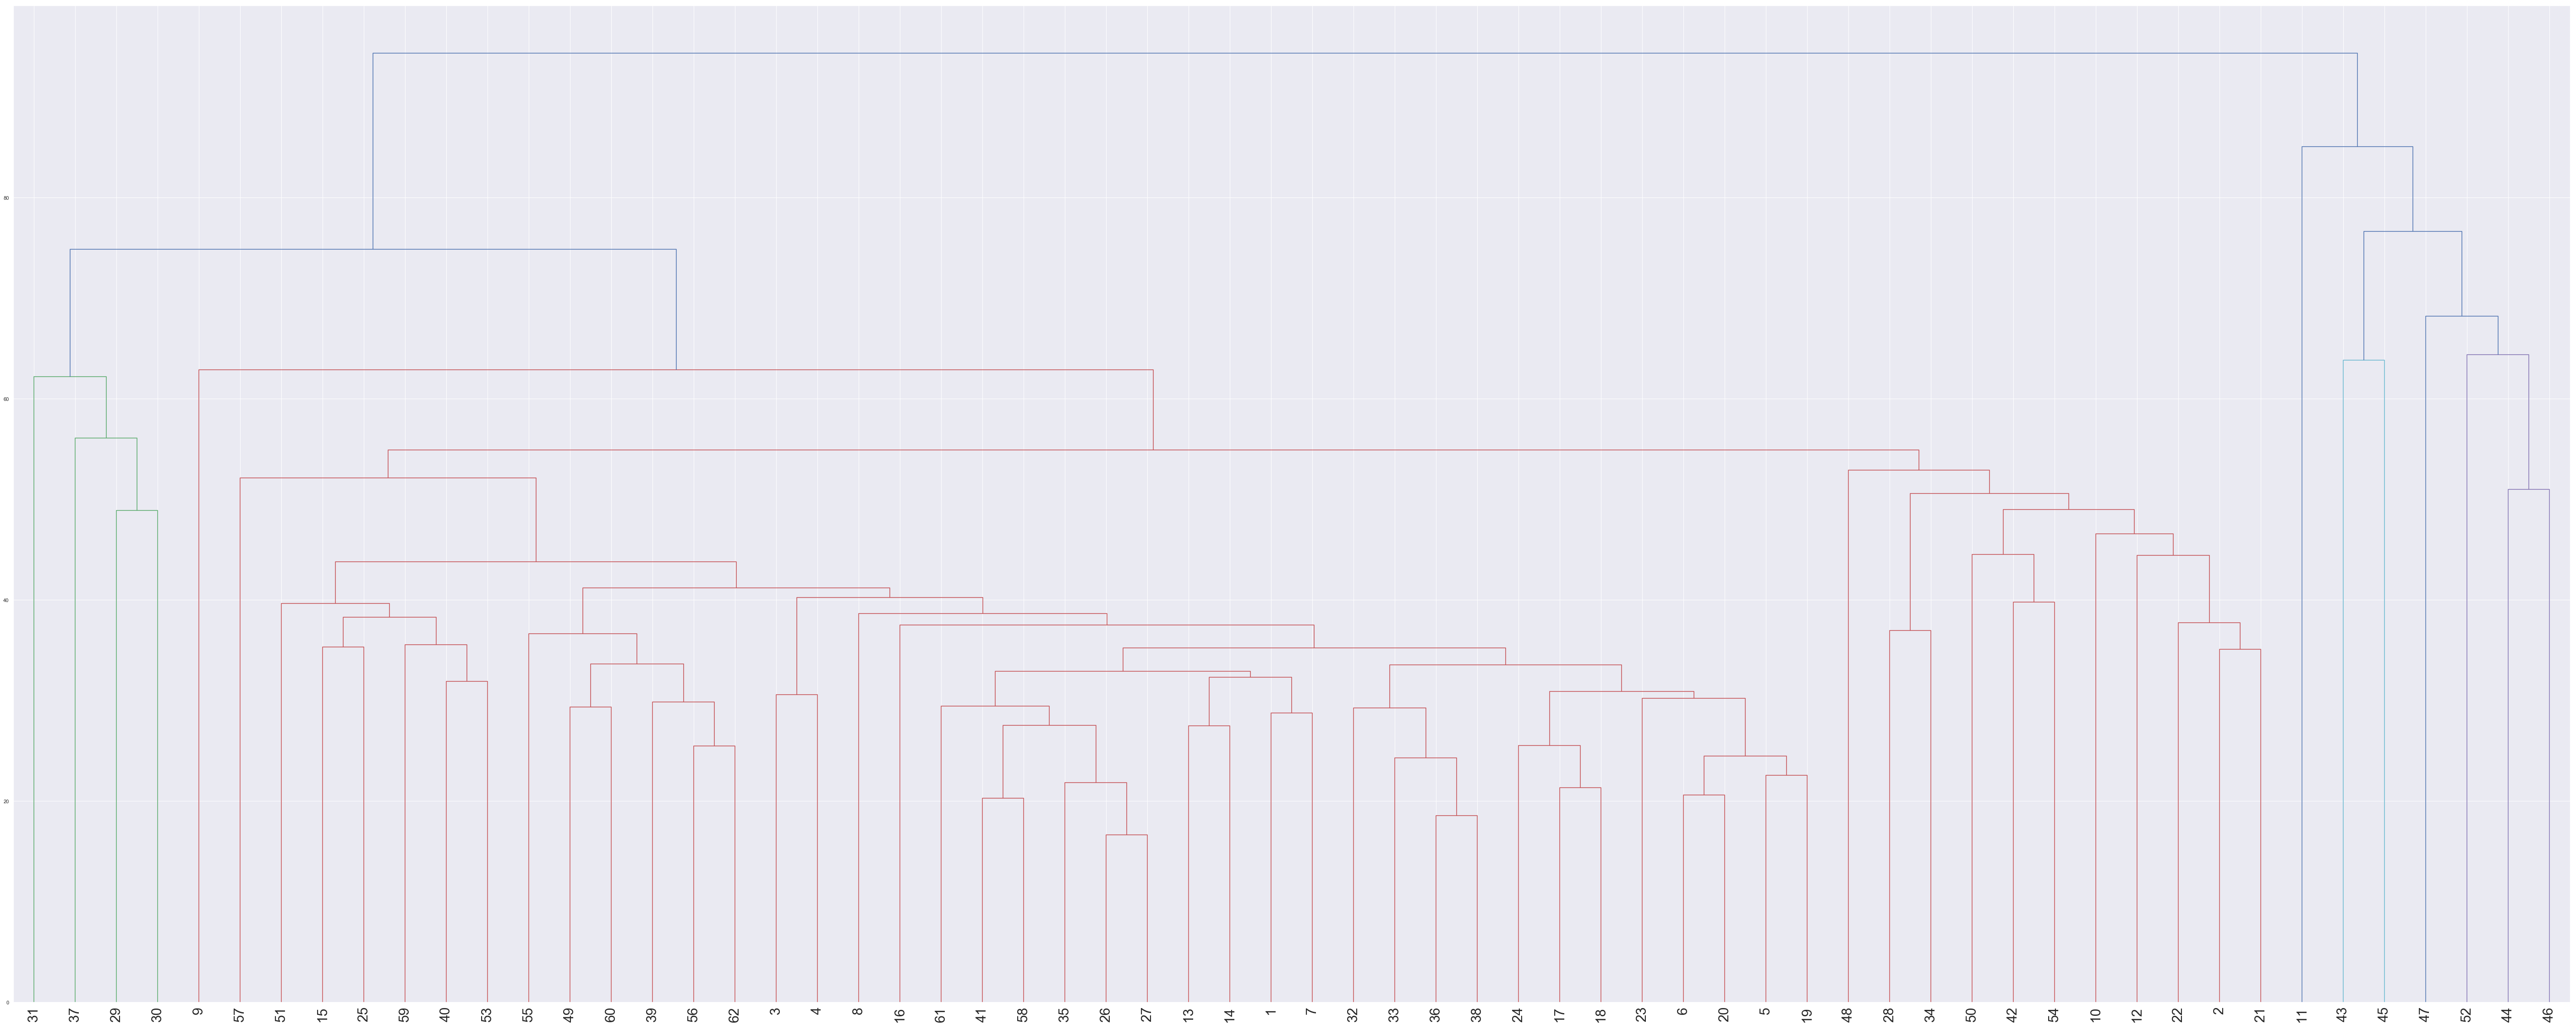

In [31]:
linked    = linkage(colon_sc, 'average')
labelList = range(1, 63)
plt.figure(figsize=(100, 40))
dendrogram(linked,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=30)
#plt.show()
plt.savefig('PatientHierarchicalClusteringAverage.png')

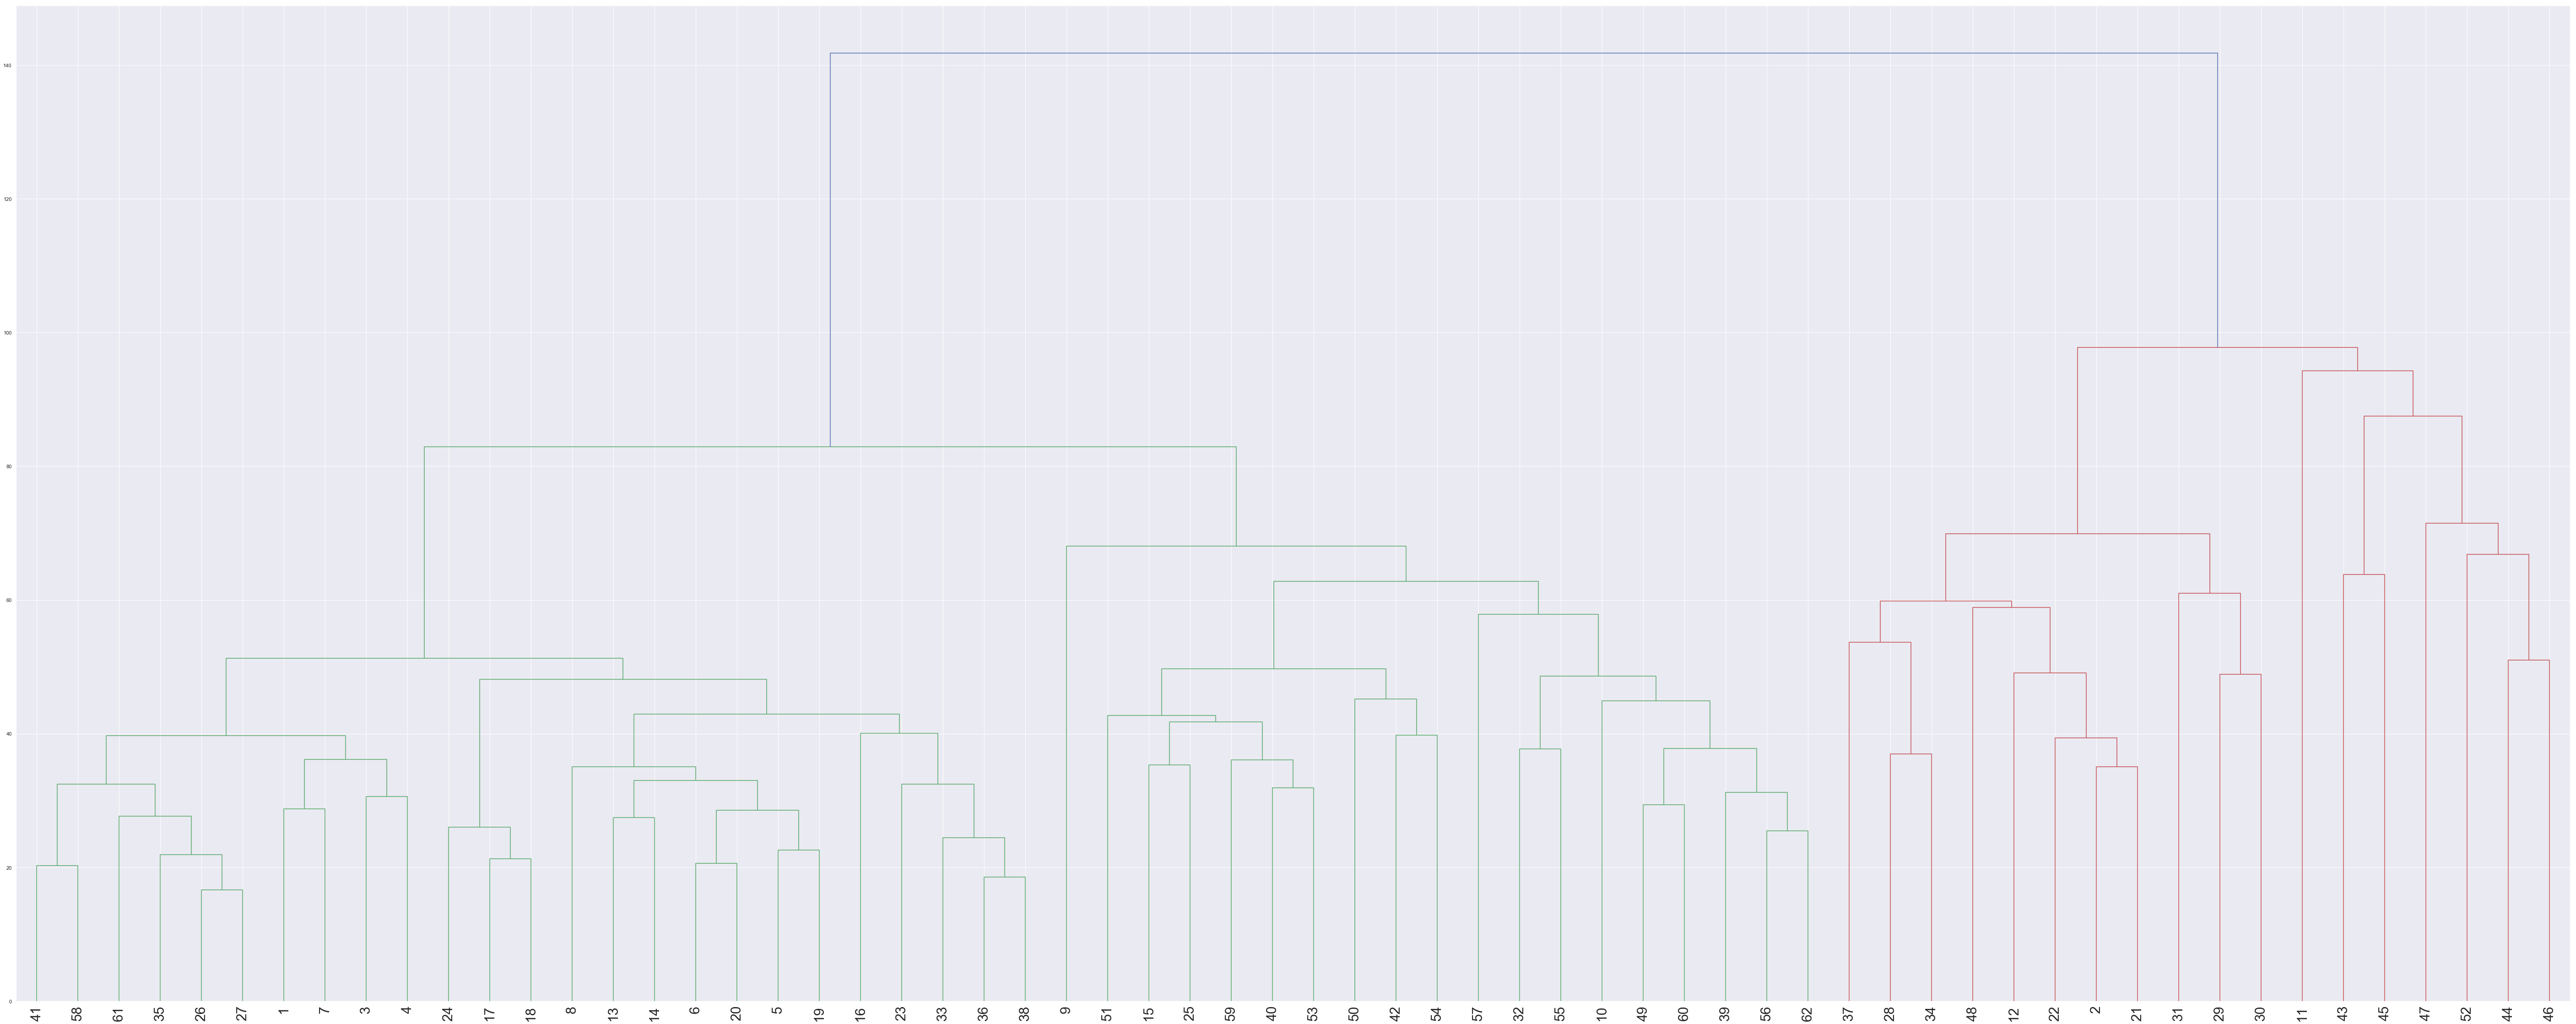

In [32]:
linked    = linkage(colon_sc, 'complete')
labelList = range(1, 63)
plt.figure(figsize=(100, 40))
dendrogram(linked,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=30)
#plt.show()
plt.savefig('PatientHierarchicalClusteringComplete.png')

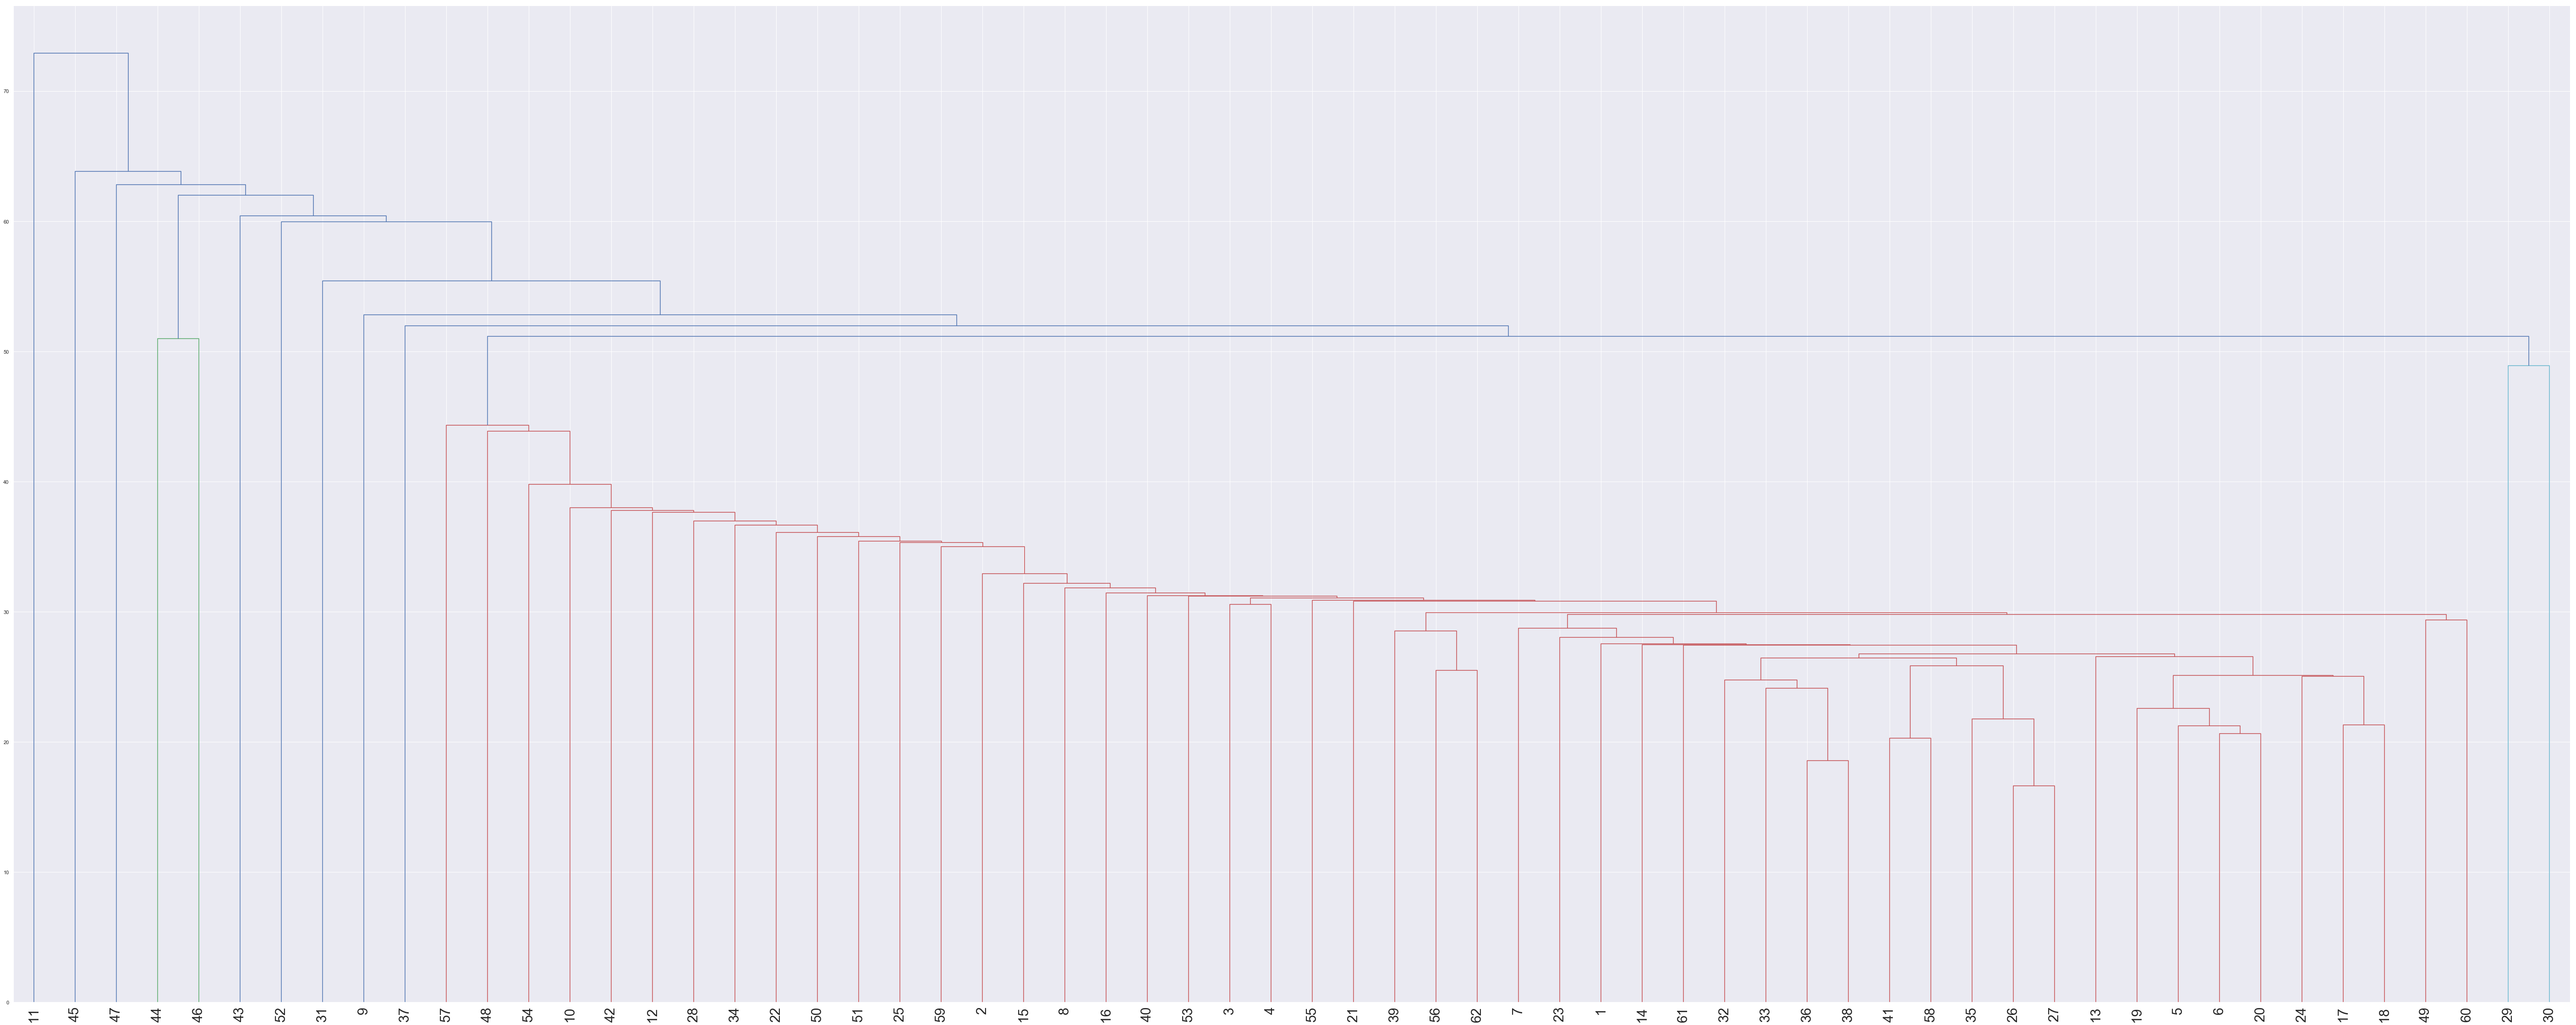

In [33]:
linked    = linkage(colon_sc, 'single')
labelList = range(1, 63)
plt.figure(figsize=(100, 40))
dendrogram(linked,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=30)
#plt.show()
plt.savefig('PatientHierarchicalClusteringSingle.png')